**Installing mpl_finance library for candlestick graphs**

In [ ]:
!pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

     - 583kB 2.8MB/s
  Created wheel for mpl-finance: filename=mpl_finance-0.10.1-cp36-none-any.whl size=8423 sha256=c20c5de99512e51977acffb6be1136700c1d099036a3e15fcf5579d12a80ebe0
  Stored in directory: /tmp/pip-ephem-wheel-cache-3wvqh2s2/wheels/8f/bf/8a/6c858b2a3be945c7b2d658fbf6ab797b451d686cbee8aa2679
Successfully built mpl-finance


# **Importing required libraries**

Numpy for Linear Algebra

Pandas for data preprocessing

candlestick_ohlc for plotting candle stick graphs

ARIMA is the statistical predictions model

fbprophet for the prediction of time series data


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib.ticker as mticker
from mpl_finance import candlestick_ohlc
from fbprophet import Prophet
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas import DataFrame
color = sns.color_palette()
%matplotlib inline
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

loading the historical prices of cryptocurrencies {bitcoin, dash, ethereum, iota, litecoin, monero, nem, neo, numeraire, ripple, stratis, waves} 

In [ ]:
crypto_data = {}

crypto_data['bitcoin'] = pd.read_csv('/content/drive/My Drive/Cryptocurrency Price Prediction/bitcoin_price.csv', parse_dates=['Date'])
crypto_data['bitcoin_cash'] = pd.read_csv("/content/drive/My Drive/Cryptocurrency Price Prediction/bitcoin_cash_price.csv", parse_dates=['Date'])
crypto_data['dash'] = pd.read_csv("/content/drive/My Drive/Cryptocurrency Price Prediction/dash_price.csv", parse_dates=['Date'])
crypto_data['ethereum'] = pd.read_csv("/content/drive/My Drive/Cryptocurrency Price Prediction/ethereum_price.csv", parse_dates=['Date'])
crypto_data['iota'] = pd.read_csv("/content/drive/My Drive/Cryptocurrency Price Prediction/iota_price.csv", parse_dates=['Date'])
crypto_data['litecoin'] = pd.read_csv("/content/drive/My Drive/Cryptocurrency Price Prediction/litecoin_price.csv", parse_dates=['Date'])
crypto_data['monero'] = pd.read_csv("/content/drive/My Drive/Cryptocurrency Price Prediction/monero_price.csv", parse_dates=['Date'])
crypto_data['nem'] = pd.read_csv("/content/drive/My Drive/Cryptocurrency Price Prediction/nem_price.csv", parse_dates=['Date'])
crypto_data['neo'] = pd.read_csv("/content/drive/My Drive/Cryptocurrency Price Prediction/neo_price.csv", parse_dates=['Date'])
crypto_data['numeraire'] = pd.read_csv("/content/drive/My Drive/Cryptocurrency Price Prediction/numeraire_price.csv", parse_dates=['Date'])
crypto_data['ripple'] = pd.read_csv("/content/drive/My Drive/Cryptocurrency Price Prediction/ripple_price.csv", parse_dates=['Date'])
crypto_data['stratis'] = pd.read_csv("/content/drive/My Drive/Cryptocurrency Price Prediction/stratis_price.csv", parse_dates=['Date'])
crypto_data['waves'] = pd.read_csv("/content/drive/My Drive/Cryptocurrency Price Prediction/waves_price.csv", parse_dates=['Date'])


# **Candle Stick representaions of different Cryptocurrencies**

CandleStick Chart is used for the representation financial data. Chart will be based on four columns such as Open, Close, High, Low. The hollow and filled portion in chart represented as if stocks closes higher than its opening values with top line represent as closing price and bottom line as opening price and if stocks closes lower than its opening values with top line represent as opening price and bottom lines as closing price respectively.

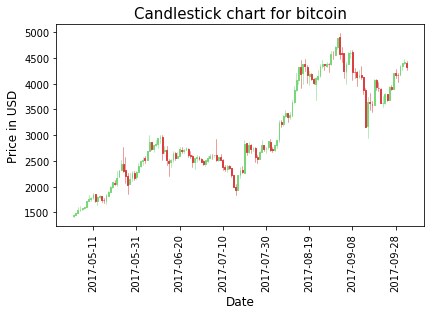

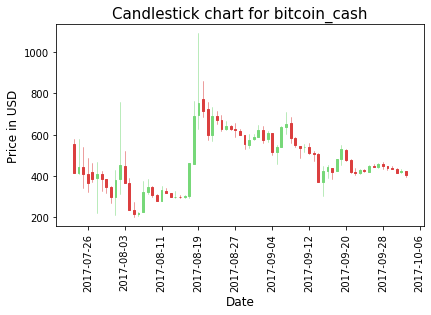

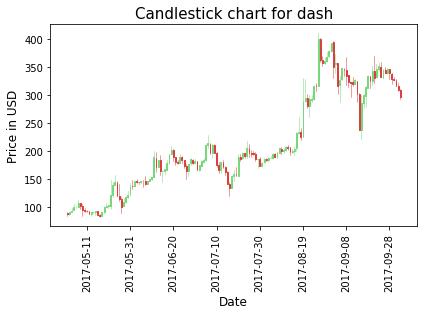

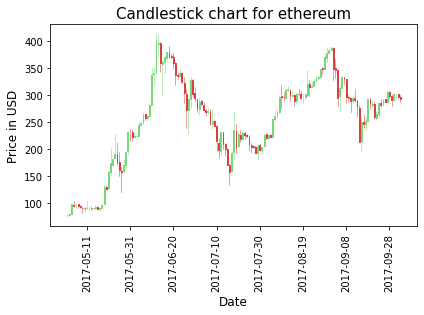

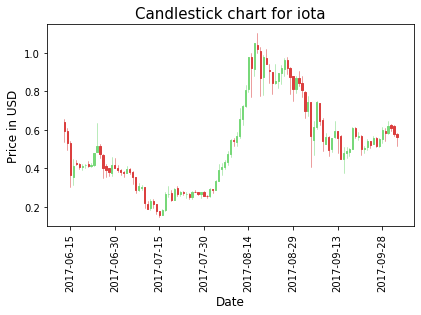

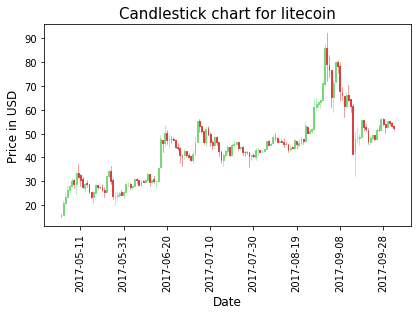

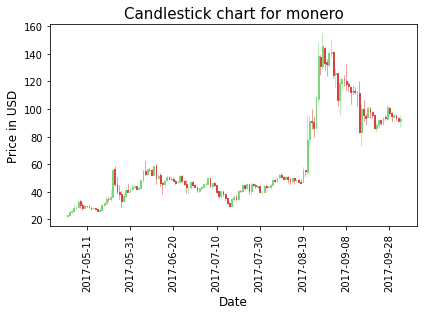

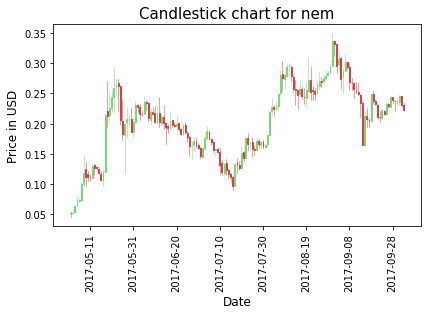

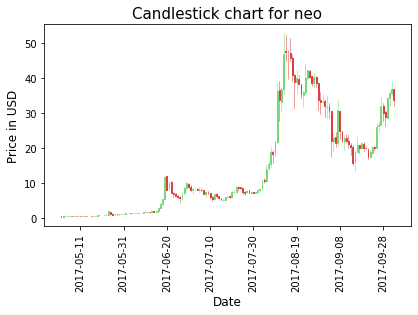

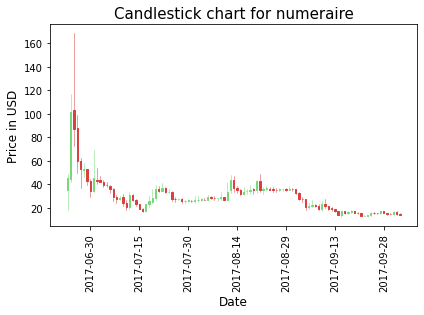

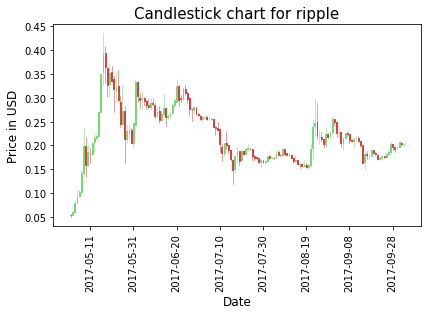

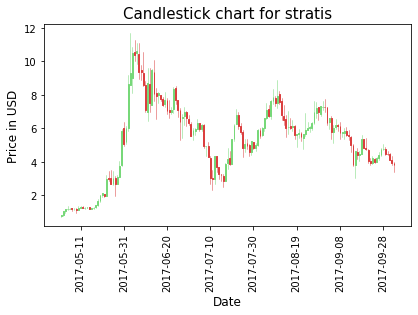

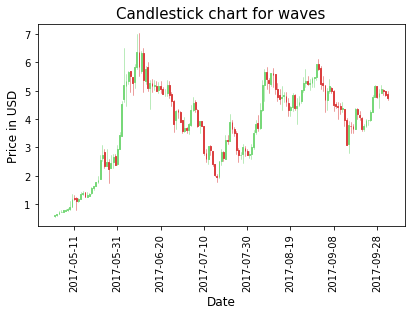

In [ ]:
for coin in crypto_data:
    df = pd.DataFrame(crypto_data[coin])
    fig = plt.figure(figsize=(6,4))
    ax1 = plt.subplot2grid((1,1), (0,0))
    
    df['Date_mpl'] = df['Date'].apply(lambda x: mdates.date2num(x))
    temp_df = df[df['Date']>'2017-05-01']
    ohlc = []
    for ind, row in temp_df.iterrows():
        ol = [row['Date_mpl'],row['Open'], row['High'], row['Low'], row['Close'], row['Volume']]
        ohlc.append(ol)

    candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))

    plt.xlabel("Date", fontsize=12)
    plt.xticks(rotation='vertical')
    plt.ylabel("Price in USD", fontsize=12 )
    title_str = "Candlestick chart for " + coin
    plt.title(title_str, fontsize=15)
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()

Deleting iota, numeraire, bitcoin_cash due to the gradual decrease in their prices

In [ ]:
del crypto_data['iota'], crypto_data['numeraire'], crypto_data['bitcoin_cash']

# **Corelation Map using different models**

Correlation is a method of defining linear relationship between two variables. Here variables are different cryptocurrencies. Correlation here is calculated using three techniques such as: Spearman, Pearson, Kendall.

# Spearman Corelation Map

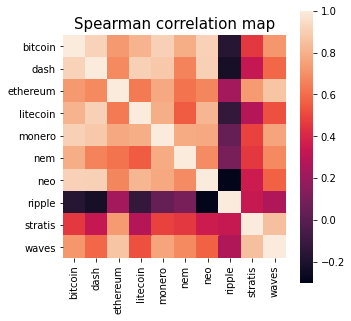

,bitcoin,dash,ethereum,litecoin,monero,nem,neo,ripple,stratis,waves
bitcoin,1.000000,0.914531,0.726564,0.807568,0.905473,0.794435,0.910046,-0.165415,0.459659,0.717617
dash,0.914531,1.000000,0.680765,0.907473,0.882321,0.662038,0.906313,-0.221101,0.330550,0.587892
ethereum,0.726564,0.680765,1.000000,0.635456,0.776019,0.615269,0.673348,0.230670,0.732084,0.866832
litecoin,0.807568,0.907473,0.635456,1.000000,0.796681,0.555973,0.820562,-0.122343,0.275247,0.523164
monero,0.905473,0.882321,0.776019,0.796681,1.000000,0.786479,0.773002,0.043838,0.489196,0.762118
nem,0.794435,0.662038,0.615269,0.555973,0.786479,1.000000,0.687436,0.096394,0.457966,0.684301
neo,0.910046,0.906313,0.673348,0.820562,0.773002,0.687436,1.000000,-0.299865,0.350628,0.572132
ripple,-0.165415,-0.221101,0.230670,-0.122343,0.043838,0.096394,-0.299865,1.000000,0.339029,0.262035
stratis,0.459659,0.330550,0.732084,0.275247,0.489196,0.457966,0.350628,0.339029,1.000000,0.850134
waves,0.717617,0.587892,0.866832,0.523164,0.762118,0.684301,0.572132,0.262035,0.850134,1.000000


In [ ]:
df = pd.DataFrame() 
currency_name = []
df['Date'] = crypto_data['bitcoin'].Date 
df = df[df['Date']>'2017-05-01']
for coin in crypto_data:
    currency_name.append(coin)
    temp_df = crypto_data[coin]
    df[coin] = temp_df[temp_df['Date']>'2017-05-01'].Close

temp_df = df[currency_name]
corrmat = temp_df.corr(method='spearman')
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Spearman correlation map", fontsize=15)
plt.show()
temp_df.corr(method='spearman')

# Pearson Corelation Map

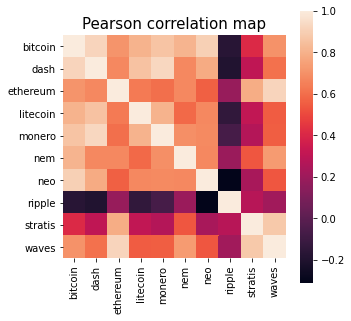

,bitcoin,dash,ethereum,litecoin,monero,nem,neo,ripple,stratis,waves
bitcoin,1.000000,0.921408,0.713243,0.808501,0.862747,0.815765,0.905562,-0.169163,0.410236,0.707216
dash,0.921408,1.000000,0.675973,0.860210,0.931274,0.672795,0.783124,-0.195296,0.306310,0.610040
ethereum,0.713243,0.675973,1.000000,0.635205,0.603051,0.676897,0.563220,0.181955,0.785574,0.921006
litecoin,0.808501,0.860210,0.635205,1.000000,0.807678,0.587752,0.673954,-0.138019,0.313985,0.553962
monero,0.862747,0.931274,0.603051,0.807678,1.000000,0.696245,0.680151,-0.064619,0.272784,0.556851
nem,0.815765,0.672795,0.676897,0.587752,0.696245,1.000000,0.677668,0.194928,0.534678,0.733841
neo,0.905562,0.783124,0.563220,0.673954,0.680151,0.677668,1.000000,-0.309045,0.237412,0.538941
ripple,-0.169163,-0.195296,0.181955,-0.138019,-0.064619,0.194928,-0.309045,1.000000,0.283663,0.214280
stratis,0.410236,0.306310,0.785574,0.313985,0.272784,0.534678,0.237412,0.283663,1.000000,0.879594
waves,0.707216,0.610040,0.921006,0.553962,0.556851,0.733841,0.538941,0.214280,0.879594,1.000000


In [ ]:
df = pd.DataFrame() 
currency_name = []
df['Date'] = crypto_data['bitcoin'].Date 
df = df[df['Date']>'2017-05-01']
for coin in crypto_data:
    currency_name.append(coin)
    temp_df = crypto_data[coin]
    df[coin] = temp_df[temp_df['Date']>'2017-05-01'].Close

temp_df = df[currency_name]
corrmat = temp_df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Pearson correlation map", fontsize=15)
plt.show()
temp_df.corr(method='pearson')

# Kendall Corelation Map

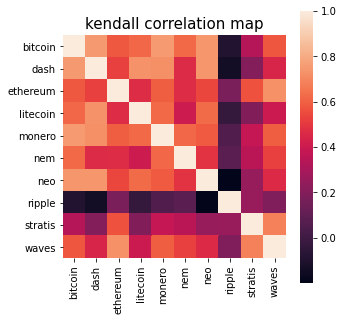

,bitcoin,dash,ethereum,litecoin,monero,nem,neo,ripple,stratis,waves
bitcoin,1.000000,0.748136,0.581675,0.620045,0.751885,0.622958,0.741160,-0.088898,0.338058,0.576964
dash,0.748136,1.000000,0.519502,0.731333,0.722893,0.465270,0.738143,-0.141014,0.201694,0.443289
ethereum,0.581675,0.519502,1.000000,0.470312,0.594796,0.467887,0.537646,0.175458,0.565774,0.725512
litecoin,0.620045,0.731333,0.470312,1.000000,0.622444,0.403000,0.625461,-0.033939,0.190320,0.397064
monero,0.751885,0.722893,0.594796,0.622444,1.000000,0.617647,0.586860,0.049690,0.379015,0.596302
nem,0.622958,0.465270,0.467887,0.403000,0.617647,1.000000,0.488436,0.085379,0.352315,0.523460
neo,0.741160,0.738143,0.537646,0.625461,0.586860,0.488436,1.000000,-0.198676,0.254215,0.459764
ripple,-0.088898,-0.141014,0.175458,-0.033939,0.049690,0.085379,-0.198676,1.000000,0.256206,0.189023
stratis,0.338058,0.201694,0.565774,0.190320,0.379015,0.352315,0.254215,0.256206,1.000000,0.683762
waves,0.576964,0.443289,0.725512,0.397064,0.596302,0.523460,0.459764,0.189023,0.683762,1.000000


In [ ]:
df = pd.DataFrame() 
currency_name = []
df['Date'] = crypto_data['bitcoin'].Date 
df = df[df['Date']>'2017-05-01']
for coin in crypto_data:
    currency_name.append(coin)
    temp_df = crypto_data[coin]
    df[coin] = temp_df[temp_df['Date']>'2017-05-01'].Close

temp_df = df[currency_name]
corrmat = temp_df.corr(method='kendall')
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("kendall correlation map", fontsize=15)
plt.show()
temp_df.corr(method='kendall')

# **Predicting the future values of Cryptocurrencies**

For the prediction of future values package used here is Fbprophet. Fbprophet is a package used for predicting Time-series data.

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality

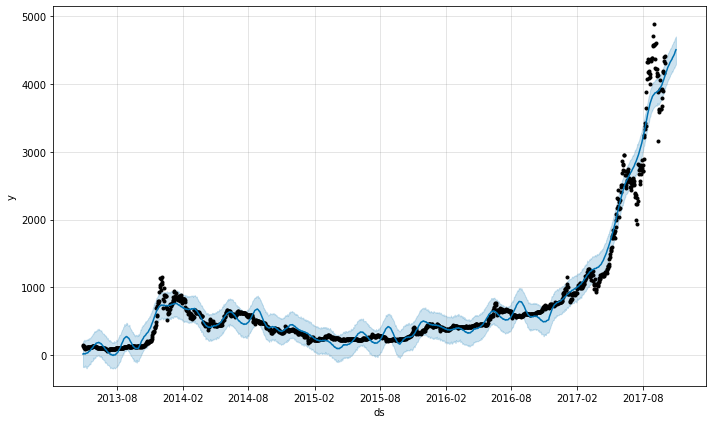

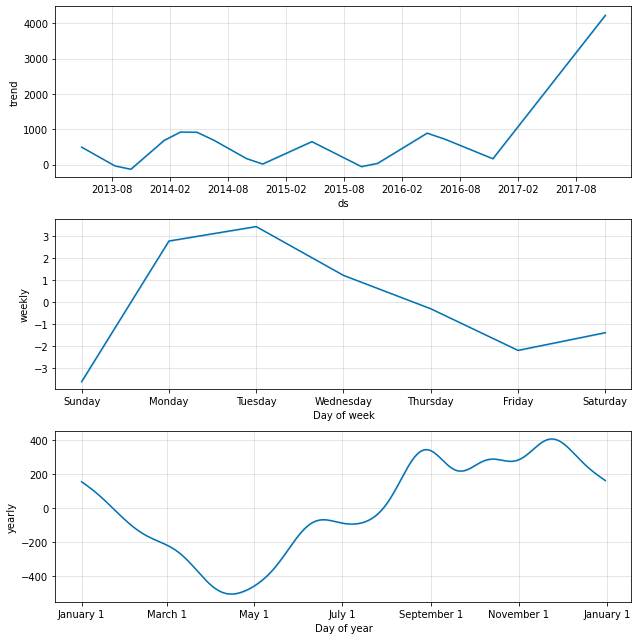

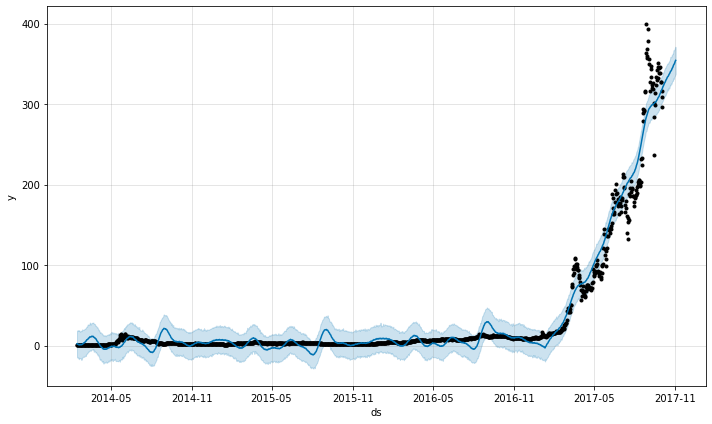

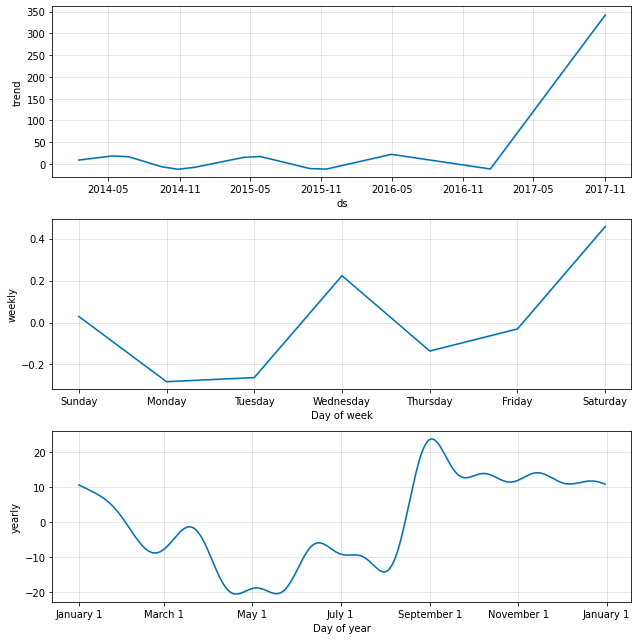

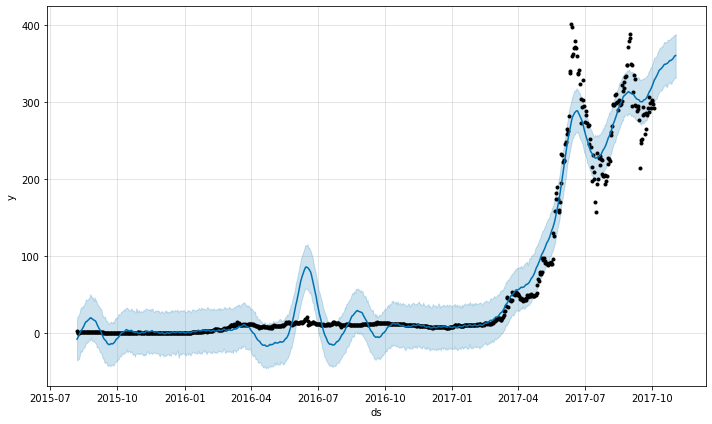

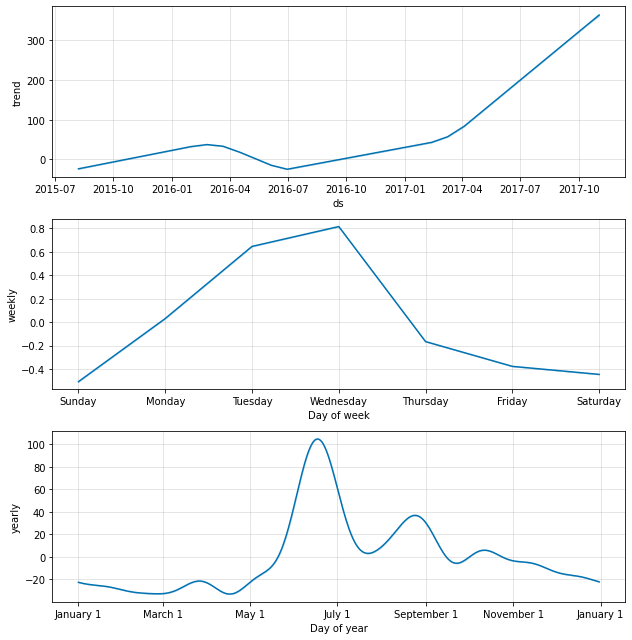

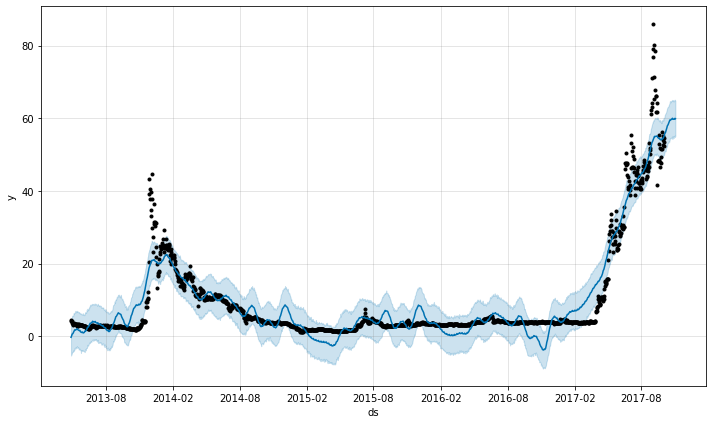

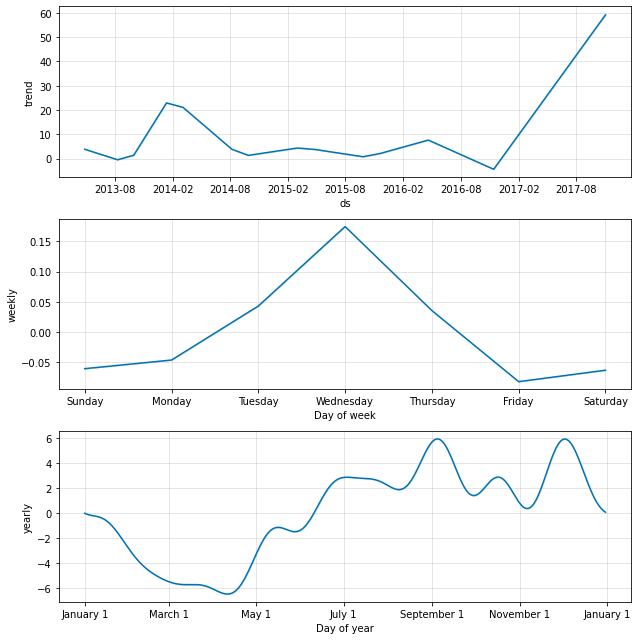

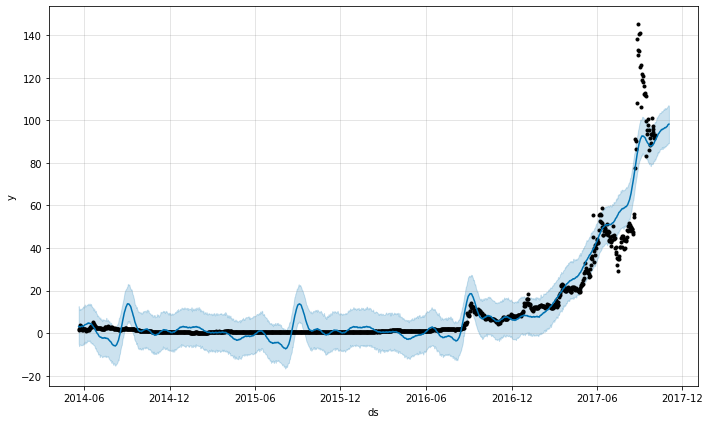

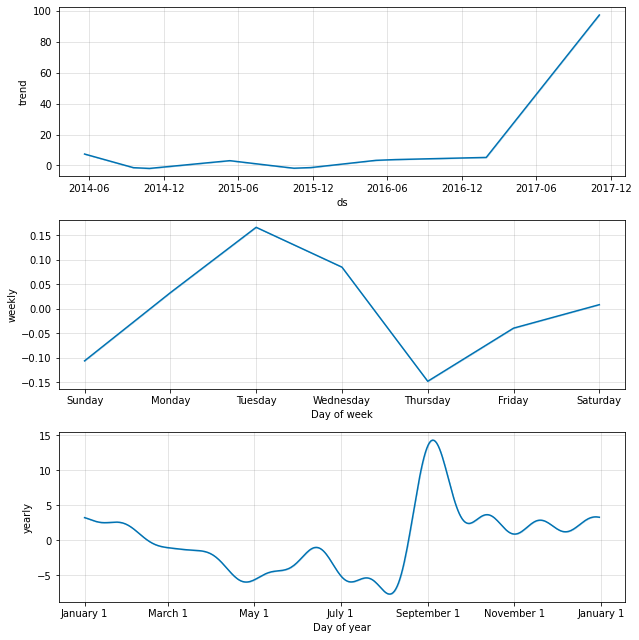

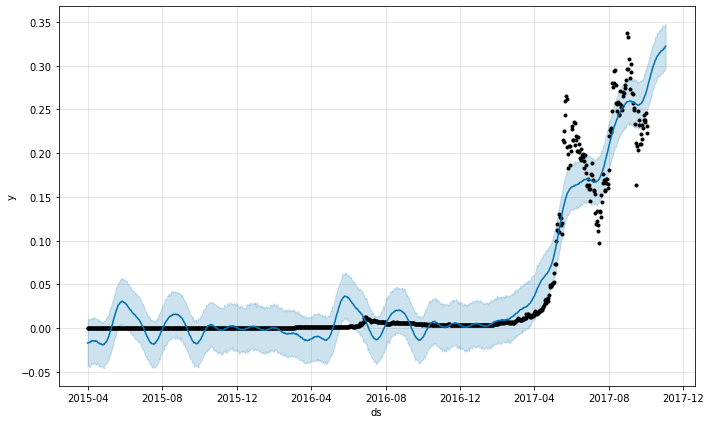

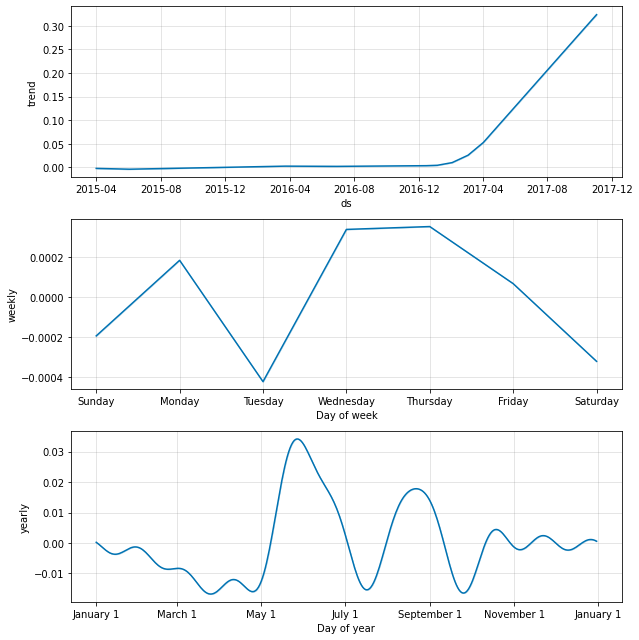

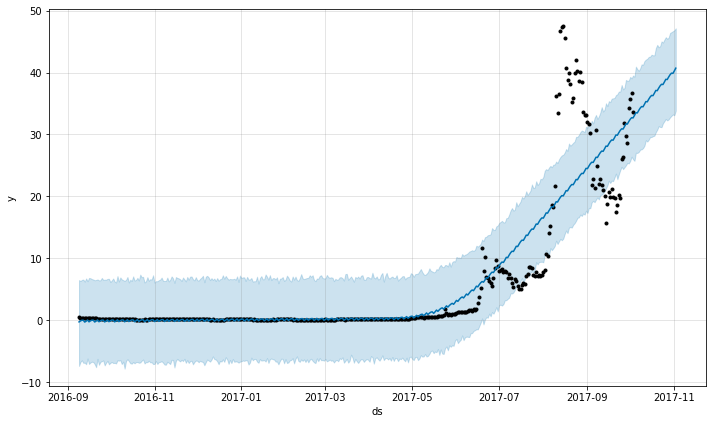

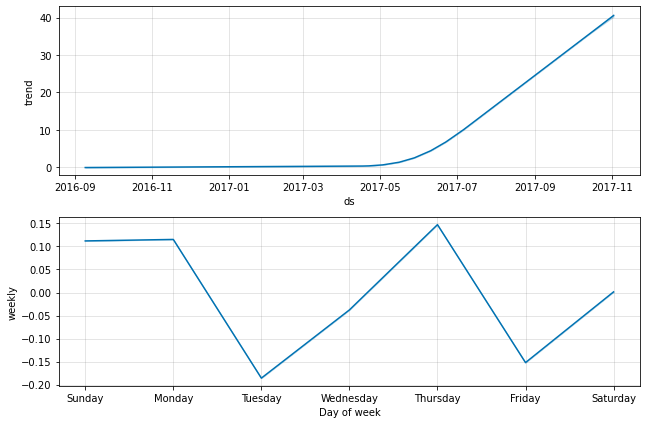

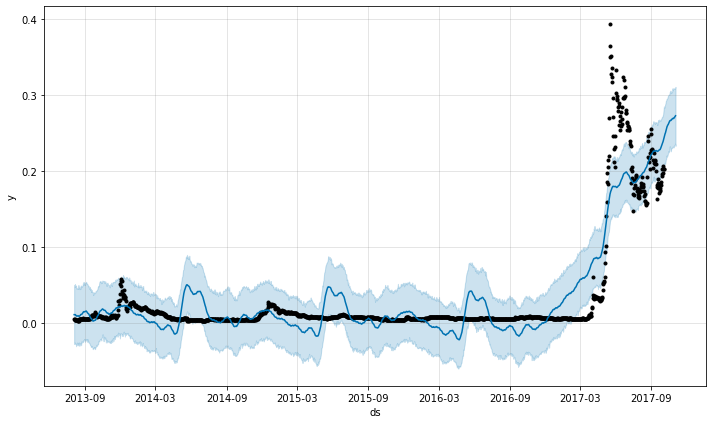

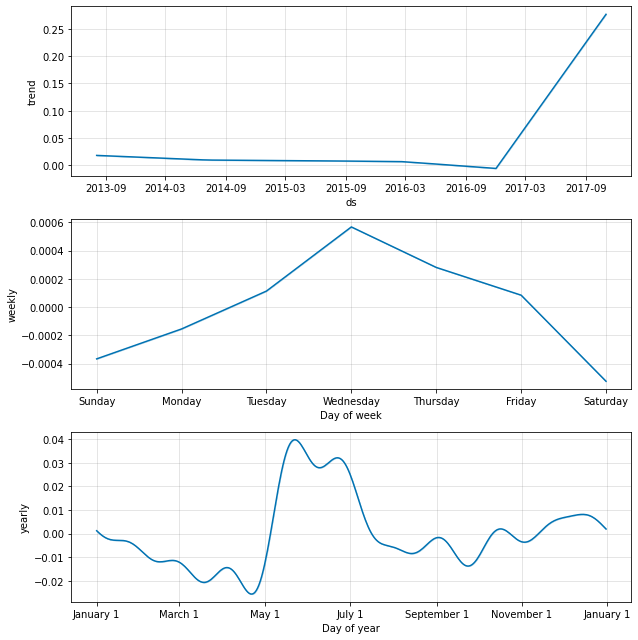

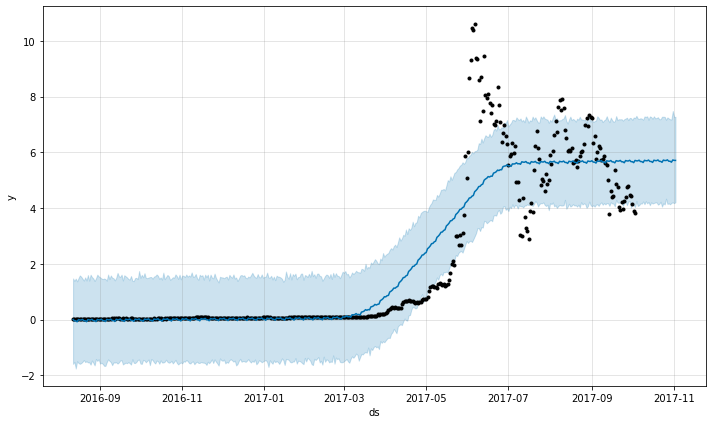

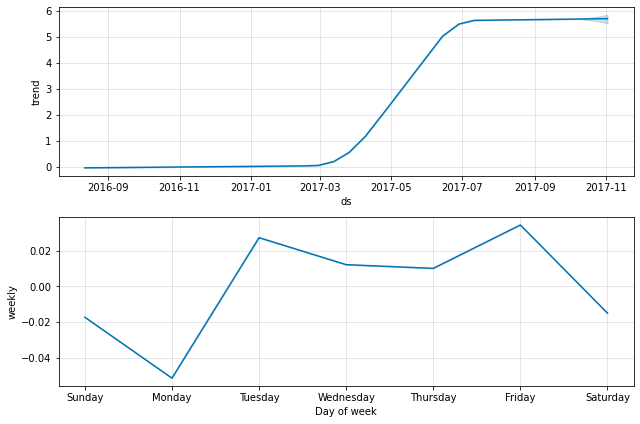

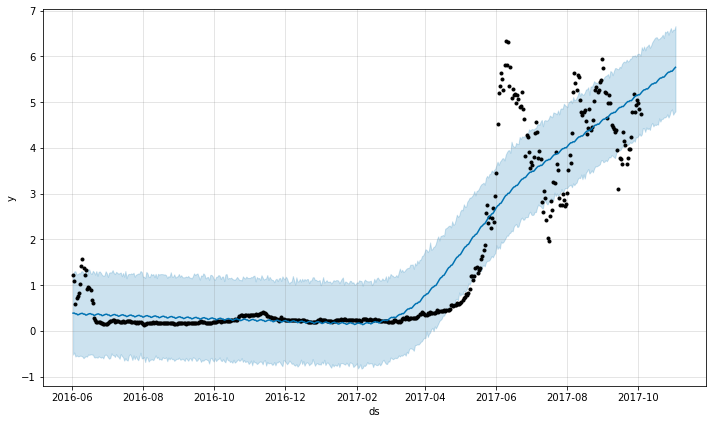

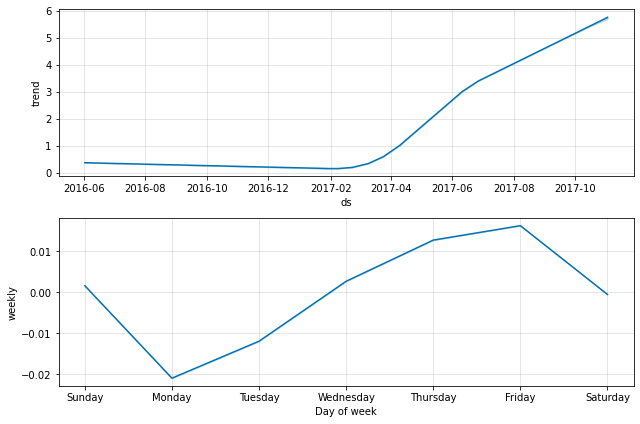

In [ ]:
for coin in crypto_data:
    df = pd.DataFrame(crypto_data[coin])
    temp_df = pd.DataFrame()
    temp_df['ds'] = df['Date']
    temp_df['y'] = df['Close']
    model = Prophet()
    model.fit(temp_df)
    future = model.make_future_dataframe(periods = 30)
    forecast = model.predict(future)
    title_str = "predicted value of "+ coin
    model.plot(forecast)
    model.plot_components(forecast)

# **ARIMA model for prediction**
For using ARIMA model imported the package from statsmodels.tsa.arima_model and it is used for prediction of future prices


In [ ]:
df_bitcoin = pd.DataFrame(crypto_data['bitcoin'])

df_bitcoin = df_bitcoin[['Date','Close']]
df_bitcoin.set_index('Date', inplace = True)

# Fitting the model and plotting residual errors

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency -1D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency -1D will be used.



                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1619
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -8731.852
Method:                       css-mle   S.D. of innovations             53.218
Date:                Thu, 18 Jun 2020   AIC                          17477.704
Time:                        09:09:25   BIC                          17515.430
Sample:                    10-02-2017   HQIC                         17491.704
                         - 04-28-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -2.5833      1.245     -2.076      0.038      -5.023      -0.144
ar.L1.D.Close    -0.0583      0.025     -2.346      0.019      -0.107      -0.010
ar.L2.D.Close     0.0097      0.025     

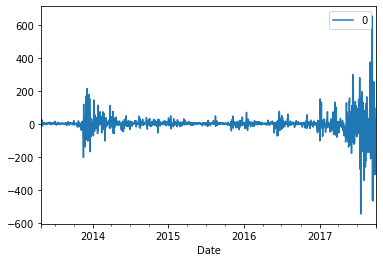

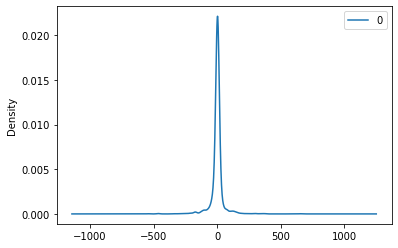

                 0
count  1619.000000
mean     -0.000861
std      53.238108
min    -544.713720
25%      -4.746813
50%       2.072056
75%       7.299510
max     652.476955


In [ ]:
model = ARIMA(df_bitcoin, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

# Predicting future values and calculating mean squared error.

predicted=612.039153, expected=622.370000
predicted=618.075545, expected=631.110000
predicted=626.250383, expected=636.120000
predicted=633.453878, expected=628.800000
predicted=626.050868, expected=638.140000
predicted=633.810607, expected=632.100000
predicted=629.245861, expected=634.110000
predicted=632.029741, expected=627.790000
predicted=623.794600, expected=636.960000
predicted=634.176218, expected=617.450000
predicted=615.313669, expected=629.150000
predicted=625.854609, expected=663.860000
predicted=657.058230, expected=665.510000
predicted=666.084766, expected=666.780000
predicted=663.027750, expected=667.760000
predicted=661.590956, expected=559.790000
predicted=564.910246, expected=565.610000
predicted=559.202860, expected=549.260000
predicted=543.728775, expected=578.770000
predicted=584.883264, expected=582.690000
predicted=575.347306, expected=538.710000
predicted=541.522472, expected=546.320000
predicted=538.015889, expected=605.820000
predicted=598.241775, expected=605

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=854.031454, expected=892.580000
predicted=896.371851, expected=873.260000
predicted=857.254652, expected=878.480000
predicted=881.373073, expected=988.510000
predicted=975.656966, expected=893.190000
predicted=903.052596, expected=795.870000
predicted=799.917488, expected=698.230000
predicted=687.355079, expected=829.450000
predicted=825.563908, expected=1045.110000
predicted=1033.877266, expected=1151.170000
predicted=1154.087599, expected=1078.280000
predicted=1067.809956, expected=1043.330000
predicted=1027.952529, expected=955.850000
predicted=955.668071, expected=1129.430000
predicted=1126.735896, expected=1131.970000
predicted=1131.046060, expected=1031.950000
predicted=1043.541597, expected=1001.960000
predicted=979.352304, expected=928.100000
predicted=938.110809, expected=799.110000
predicted=812.629804, expected=774.250000
predicted=768.548029, expected=797.820000
predicted=797.870284, expected=771.440000
predicted=779.087323, expected=722.430000
predicted=718.51372

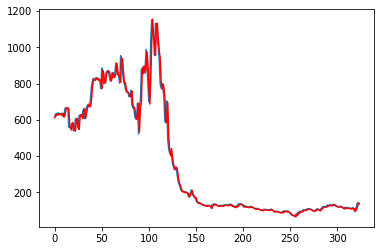

In [ ]:
X = df_bitcoin.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()